In [1]:
# Import libraries
import pandas as pd
from google.cloud import bigquery #pip install google-cloud-bigquery for SQL
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.query import get_bbc_news
# Setting secret credentials
from dotenv import load_dotenv #pip install python-dotenv
load_dotenv()

False

In [2]:
df = get_bbc_news()
df.head()

['fulltext']
This query will process 5114621 bytes.


/Users/anna_verbytska/Documents/BBC-News-Sentiment-GenAI/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1933: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,body,title,filename,category
0,The global web blog community is being called ...,Global blogger action day called,bbc/tech/016.txt,tech
1,"The ""digital divide"" between rich and poor nat...",Global digital divide 'narrowing',bbc/tech/033.txt,tech
2,The current slew of sports games offers unpara...,Sporting rivals go to extra time,bbc/tech/056.txt,tech
3,Writing a Microsoft Word document can be a dan...,Warning over Windows Word files,bbc/tech/086.txt,tech
4,"Aid workers trying to house, feed and clothe m...",Satellite mapping aids Darfur relief,bbc/tech/223.txt,tech


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      2225 non-null   object
 1   title     2225 non-null   object
 2   filename  2225 non-null   object
 3   category  2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


In [4]:
# Check for duplicated articles
df.duplicated(subset=None, keep='first')

0       False
1       False
2       False
3       False
4       False
        ...  
2220    False
2221    False
2222    False
2223    False
2224    False
Length: 2225, dtype: bool

In [5]:
# Check one article
for idx in df.sample(3).index:
    text = df.iloc[idx]  
    print("Body: {}:".format(text.body))
    print("Title: {}\n".format(text.title))
    print("Category: {}".format(text.category))

Body: US tobacco companies have welcomed an appeal court's decision to reject the government's $280bn (£155bn) claim for alleged deceit about smoking dangers.

Tobacco stocks rose sharply on Wall Street after the 2-1 decision. The court in Washington found the case - filed by the Clinton administration in 1999 - could not be brought under federal anti-racketeering laws. Anti-smoking groups urge the government to fight on, but the Justice Department has not said if it will appeal. Among the accused were Altria Group, RJ Reynolds Tobacco, Lorillard Tobacco, Liggett Group and Brown and Williamson. They were delighted by the decision, which sent Reynolds shares up 4.5% and Altria shares up 5.11%.

Charles A Blixt, executive vice-president of RJ Reynolds Tobacco, said the ruling "dramatically transforms" the government's lawsuit. Altria Group said, in a statement, the government now "must not only prove that the companies have engaged in fraudulent behaviour in the past, but that they are l

In [6]:
# Count unique categories
df["category"].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

In [ ]:
# Visualize categories to check for imbalances
fig = px.histogram(df, x='category', color='category', 
                   title="Article Count per Category", 
                   labels={"category": "Category"}, 
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(showlegend=False, height=700, width=1100)
fig.show() # pip install nbformat --upgrade

In [8]:
# The count of words in the longest article across categories
categories=['tech', 'sport', 'business', 'politics', 'entertainment']
print("The longest article by category (Word Count):")
for category in categories:
    max_words = df[df['category'] == category]['body'].apply(lambda x: len(x.split())).max()
    print(f"{category.capitalize()}: {max_words} words")


The longest article by category (Word Count):
Tech: 2964 words
Sport: 1656 words
Business: 885 words
Politics: 4428 words
Entertainment: 3477 words


In [9]:

# The count of words in the shortest article across categories
print("The shortest article by category (Word Count):")
for category in categories:
    min_words = df[df['category'] == category]['body'].apply(lambda x: len(x.split())).min()
    print(f"- {category.capitalize():<15}: {min_words} words")

The shortest article by category (Word Count):
- Tech           : 157 words
- Sport          : 108 words
- Business       : 136 words
- Politics       : 84 words
- Entertainment  : 138 words


Note: the category of politics has the longest and the shortest articles

In [10]:
# Check the shortest article in the politics section
shortest_article = df[df['category'] == 'politics'].loc[lambda x: x['body'].apply(lambda y: len(y.split())).idxmin(), 'body']
print(f"Sample article text:\n{shortest_article}")

Sample article text:
Ex-Home Secretary David Blunkett has given fresh clues that the general election will be announced on Monday.

He told BBC Radio Five Live: "I'm out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend." He clarified that he meant he would be in his Sheffield seat this weekend, not that he expected an election call then. Tony Blair is tipped to ask the Queen on Monday to dissolve Parliament ready for a 5 May poll.



In [11]:
# Check the longest article in the politics section
longest_article = df[df['category'] == 'politics'].loc[lambda x: x['body'].apply(lambda y: len(y.split())).idxmax(), 'body']
print(f"Sample article text:\n{longest_article}")

Sample article text:
The Lord Chancellor has defended government plans to introduce control orders to keep foreign and British terrorist suspects under house arrest, where there isn't enough evidence to put them on trial.

Lord Falconer insists that the proposals do not equate to a police state and strike a balance between protecting the public against the threat of terrorism and upholding civil liberties. But thriller writer Frederick Forsyth tells BBC News of his personal response to the move.



There is a mortal danger aimed at the heart of Britain. Or so says Home Secretary Charles Clarke. My reaction? So what? It is not that I am cynical or just do not care. I care about this country very much.

But in the 66 years that I have been alive, there has not been one hour, of one day, of one month, of one year, when there has not been a threat aimed at us. My point is, the British have always coped without becoming a dictatorship. We have coped with fear without becoming a state based 

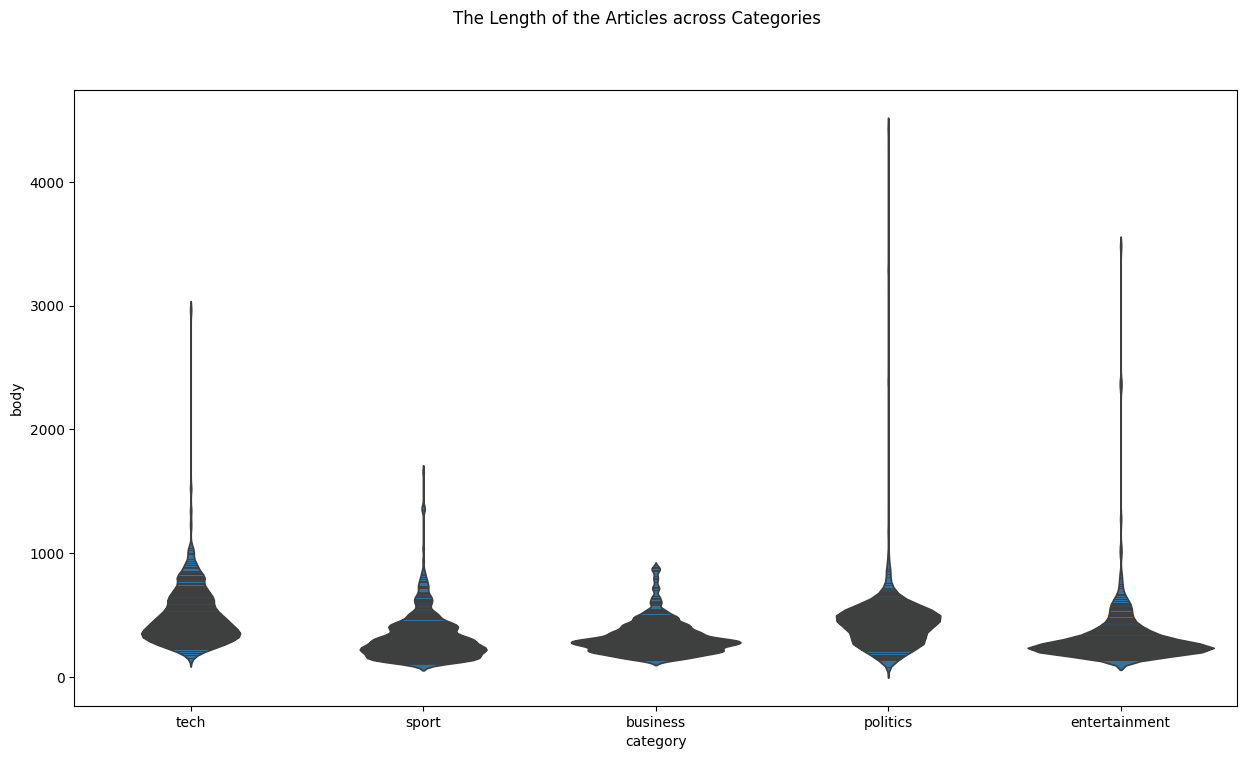

In [12]:
# Visualize length of articles across the categories for balance
fig, axs = plt.subplots(figsize=(15,8))
fig.suptitle("The Length of the Articles across Categories")
axs=sns.violinplot( x=df['category'], y=df["body"].apply(lambda x : len(x.split())), bw_adjust=.5, inner="stick")
plt.show()

In [13]:
# Create a box plot for the length of articles across categories
fig = px.box(df, x='category', y=df['body'].apply(lambda x: len(x.split())), 
             title="The Length of the Articles across Categories", 
             labels={"category": "Category", "y": "Word Count"},
             color='category',
             points="all")  # to show individual points similar to "inner=stick"

fig.update_traces(boxmean='sd')  # Show standard deviation (can be changed as needed)
fig.update_layout(showlegend=False, height=700, width=1100)

fig.show()


Note: further topic modelling and sentiment analysis may be biased by skewed article length.

LDA: Longer texts might dominate the topic distribution, while shorter texts may not provide enough data for clear topic identification.
BERTopic: even though it is a more advanced technique, extremely long texts may dominate the embeddings and clustering process, influencing the learned topics. Shorter texts might have less impact on the topic distribution, which can bias the model.

Possible solutions: 
normalization for LDA: stopword removal, stemming, lemmatization, truncation or better filtering short docs (max_words=500 or min_words=20)
normalization for BERTopic: chunking long texts and treating them as separate docs, embed the chunks, filtering very short texts.
